In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Air_lines_cleaned.csv')

In [13]:
df.columns

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [15]:
df[['Cancelled','CancellationCode']].value_counts()

Cancelled  CancellationCode
0          N                   131473
Name: count, dtype: int64

In [21]:
df['Month']=pd.to_datetime(df['Date'],format='mixed').dt.month

In [23]:
month_cancel_probs = {
    1: 0.25,  
    2: 0.20,  
    3: 0.10,  
    4: 0.05,  
    5: 0.05,  
    6: 0.10,  
    7: 0.15, 
    8: 0.05, 
    9: 0.05,  
    10: 0.02, 
    11: 0.15, 
    12: 0.20  
}

# Generate cancellations based on month-specific probabilities
df['Cancelled'] = df['Month'].apply(lambda m: np.random.choice([0, 1], p=[1 - month_cancel_probs[m], month_cancel_probs[m]]))

     

In [25]:
cancellation_values=df['Cancelled'].value_counts()

<Axes: xlabel='Cancelled', ylabel='Airline'>

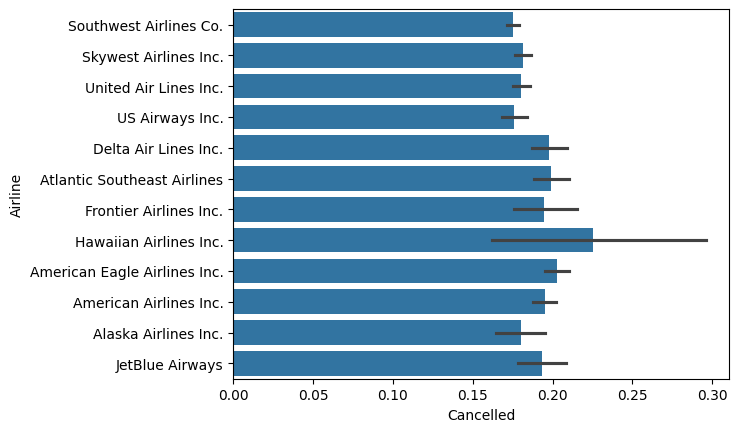

In [29]:
sns.barplot(df,x='Cancelled',y='Airline')

In [32]:
cancellations_by_month=df.groupby('Month')['Cancelled'].sum().reset_index()

<Axes: >

<Figure size 1000x800 with 0 Axes>

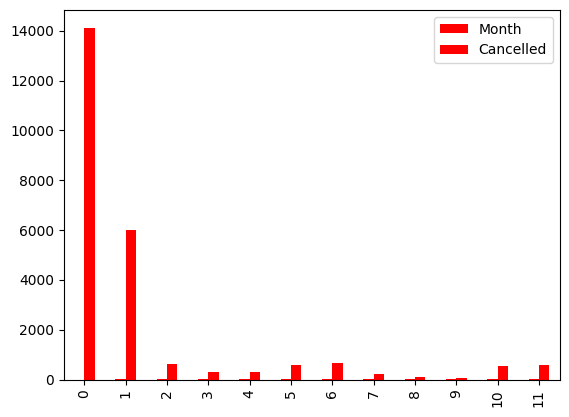

In [39]:
plt.figure(figsize=(10,8))
cancellations_by_month.plot(kind='bar',color='red')

In [47]:
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
based_on_delay=df.groupby(delay_cols)['Cancelled'].sum().reset_index()

In [48]:
based_on_delay

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled
0,0,0,0,0,15,146
1,0,0,0,0,16,146
2,0,0,0,0,17,110
3,0,0,0,0,18,121
4,0,0,0,0,19,112
...,...,...,...,...,...,...
34853,1024,0,8,0,0,0
34854,1032,0,0,0,49,1
34855,1036,0,21,0,0,0
34856,1068,0,0,0,79,0


C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_12152\220659093.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x='DelayType', y='Cancelled', palette='YlGnBu')


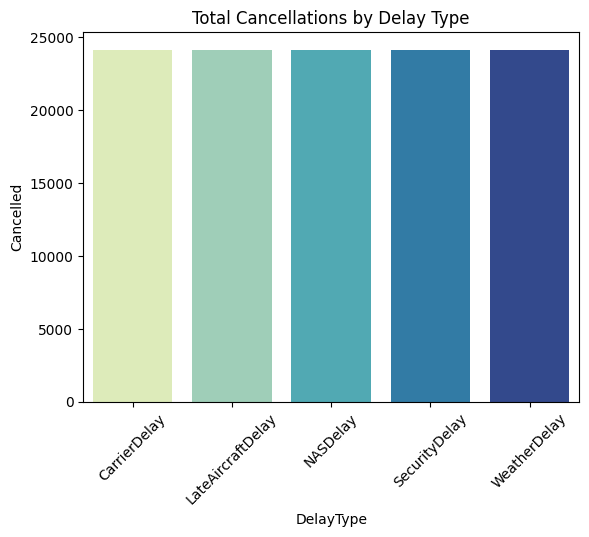

In [52]:
melted = based_on_delay.melt(
    id_vars='Cancelled',
    value_vars=delay_cols,
    var_name='DelayType',
    value_name='DelayMinutes'
)

agg = melted.groupby('DelayType', as_index=False)['Cancelled'].sum()


sns.barplot(data=agg, x='DelayType', y='Cancelled', palette='YlGnBu')
plt.xticks(rotation=45)
plt.title('Total Cancellations by Delay Type')
plt.show()



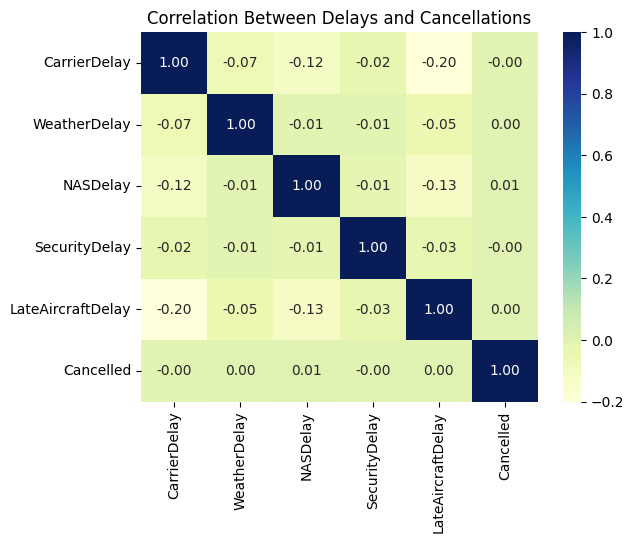

In [54]:
corr = df[delay_cols + ['Cancelled']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between Delays and Cancellations')
plt.show()

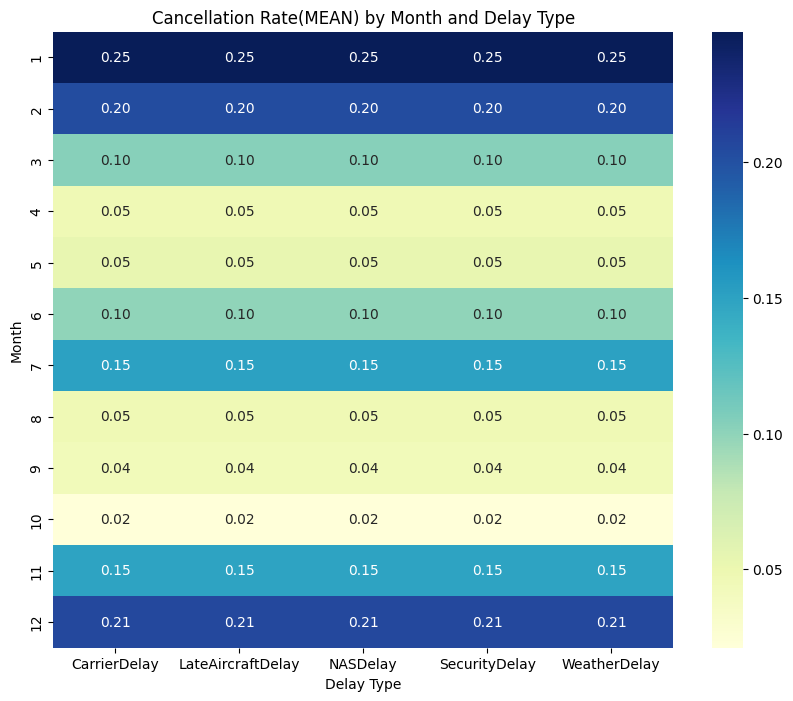

In [57]:
melted = df.melt(
    id_vars=['Month', 'Cancelled'],
    value_vars=delay_cols,
    var_name='DelayType',
    value_name='DelayMinutes'
)
matrix = (
    melted.groupby(['Month', 'DelayType'])['Cancelled']
    .mean()  # use .sum() for total cancellations instead
    .reset_index()
    .pivot(index='Month', columns='DelayType', values='Cancelled')
)
plt.figure(figsize=(10,8))
sns.heatmap(matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Cancellation Rate(MEAN) by Month and Delay Type')
plt.ylabel('Month')
plt.xlabel('Delay Type')
plt.show()

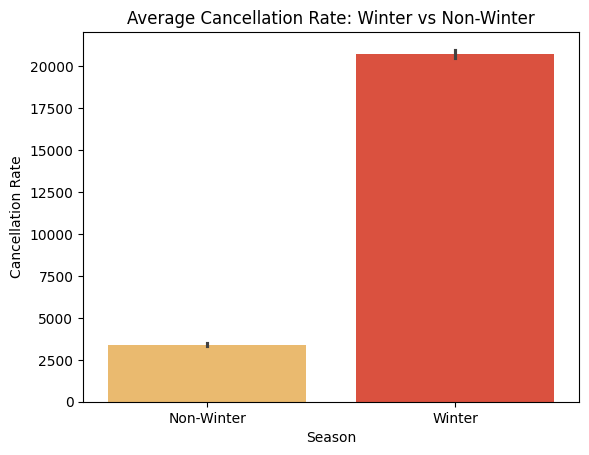

In [63]:
df['Season'] = df['Month'].apply(lambda m: 'Winter' if m in [12, 1, 2] else 'Non-Winter')
sns.barplot(
    data=df,
    x='Season',
    y='Cancelled',
    estimator='sum',
    hue='Season',
    palette='YlOrRd'
)
plt.title('Average Cancellation Rate: Winter vs Non-Winter')
plt.ylabel('Cancellation Rate')
plt.show()

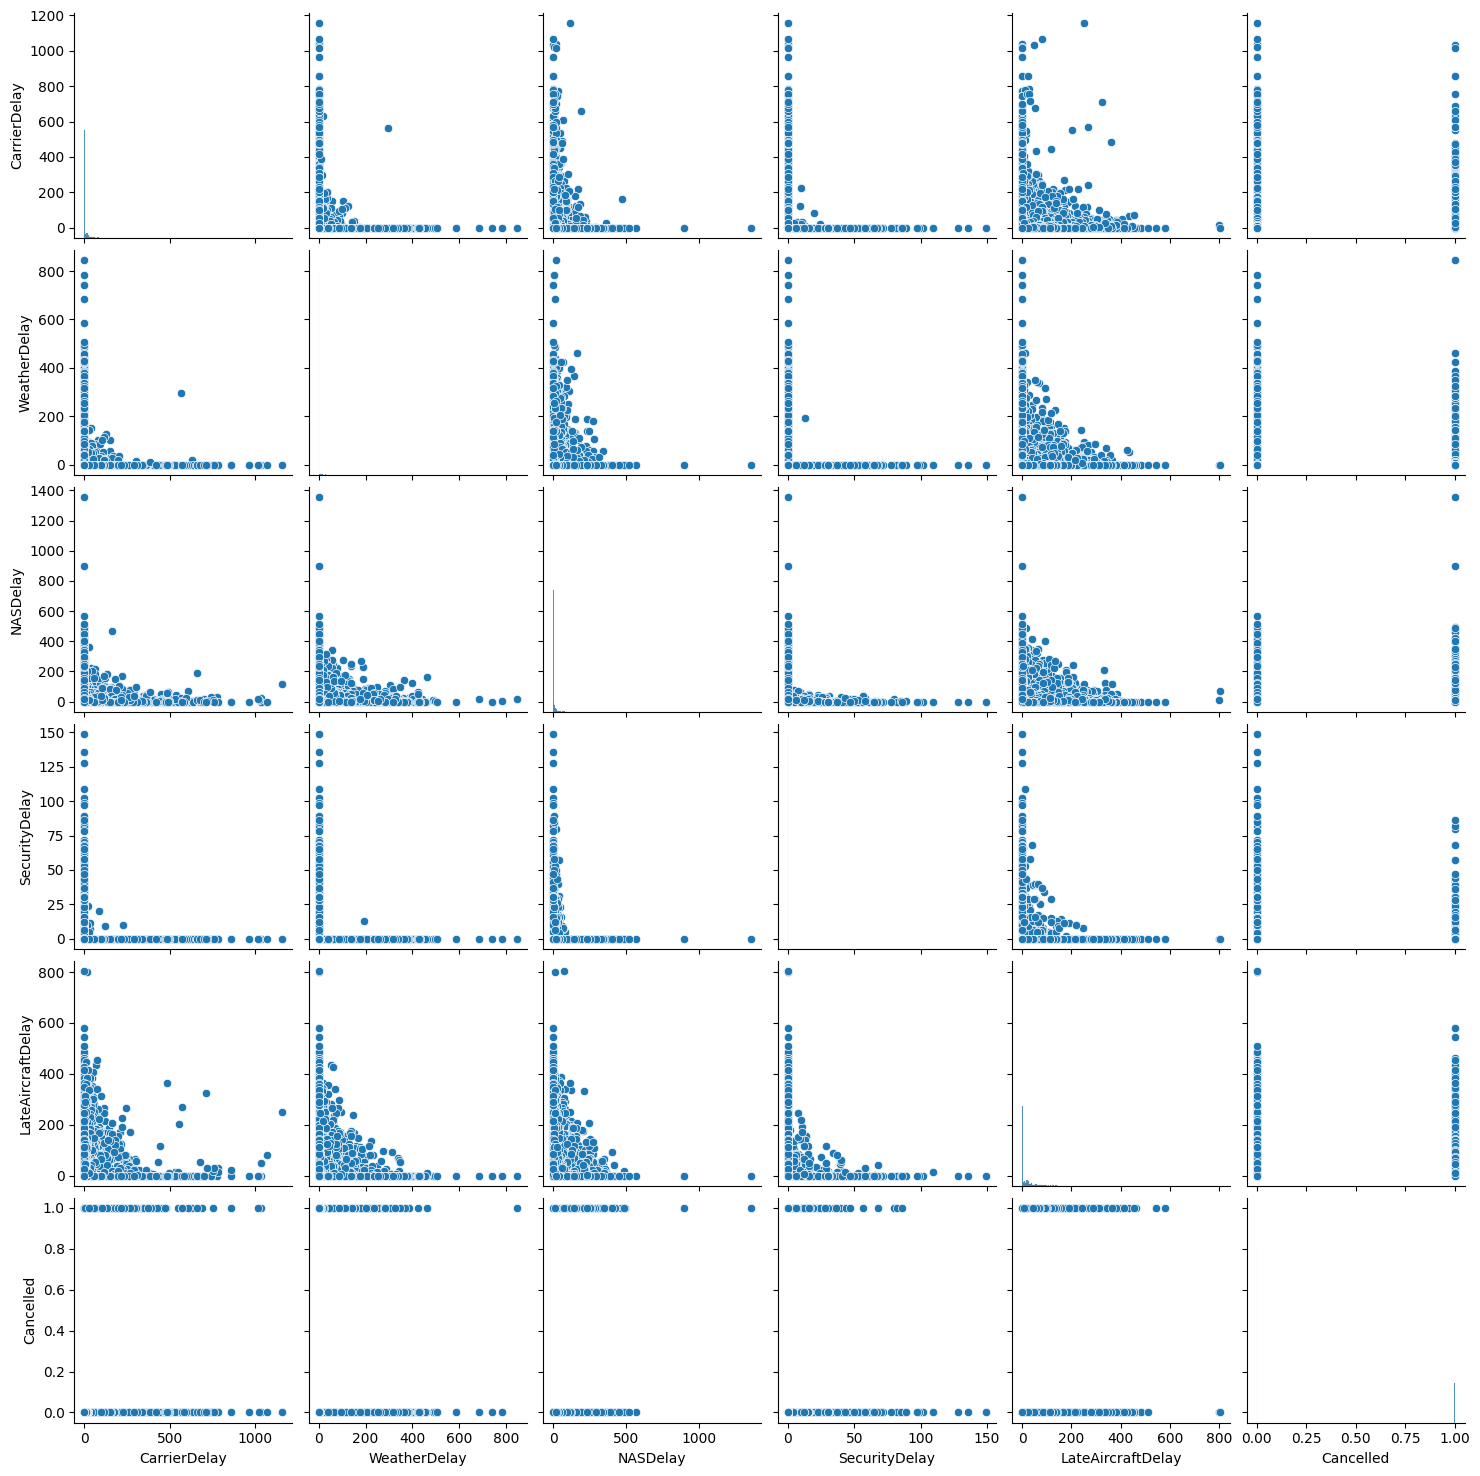

In [65]:
sns.pairplot(df[delay_cols + ['Cancelled']])